In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def get_avg(x,block=10):
    res=np.zeros((x.shape[0]//block),dtype=x.dtype)
    for i in range(res.shape[0]):
        res[i] = np.mean(x[i*block:(i+1)*block],axis=0)
    return res

In [3]:
nrows=1000
ncols=20000
np.random.seed(42)
dat=np.random.randn(nrows*ncols).reshape(nrows,ncols)
nn = 10*np.random.randn(nrows*ncols).reshape(nrows,ncols)
rwlks = np.cumsum(dat,axis=1)
rwlks_wnoise = rwlks + nn
bigdat = np.zeros((dat.shape[0], dat.shape[1]*2),dtype="float64")
bigdat[:,:ncols]=dat
ft=np.fft.rfft(bigdat,axis=1)
oo=np.ones(2*ncols,dtype="float64")
oo[ncols:]=0
navg = np.fft.irfft(np.fft.rfft(oo)*np.conj(np.fft.rfft(oo)))
print(navg)
ps = np.mean(np.abs(ft*np.conj(ft)),axis=0)
cf = np.fft.irfft(ps)/navg
# ft2 = np.fft.rfft(rwlks_wnoise,axis=1)
# ps2 = np.mean(np.abs(ft2*np.conj(ft2)),axis=0)
# ps=np.abs(np.mean(,axis=0))**2
# ps2=np.abs(np.mean(np.fft.rfft(rwlks_wnoise,axis=1),axis=0))**2

[20000. 19999. 19998. ... 19997. 19998. 19999.]


Text(0.5, 1.0, 'corr func = irfft PS')

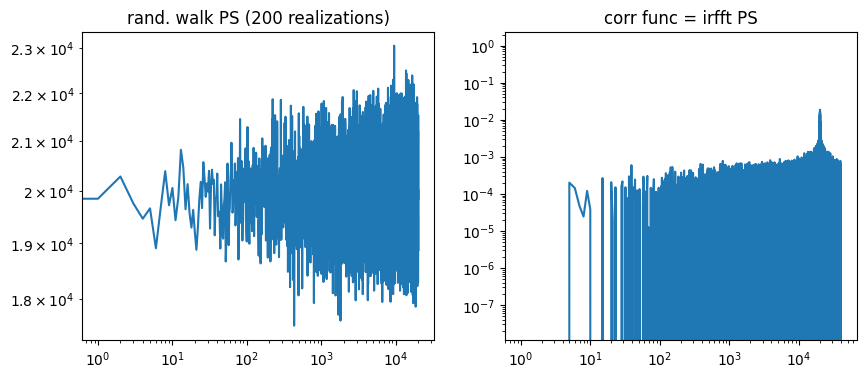

In [122]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.title("rand. walk PS (200 realizations)")
plt.loglog(ps)
plt.subplot(122)
plt.loglog(cf)
plt.title("corr func = irfft PS")

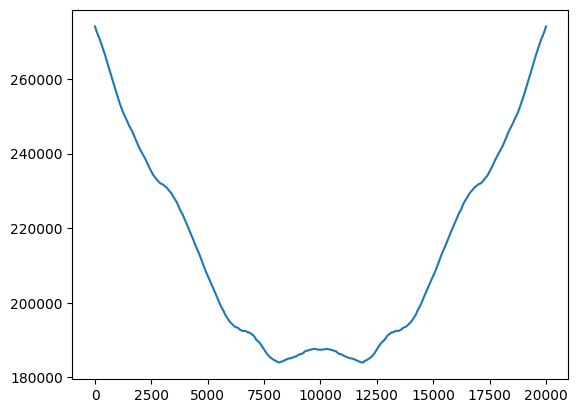

In [22]:
ncols/1e3 # white noise for like 20 samples

20.0

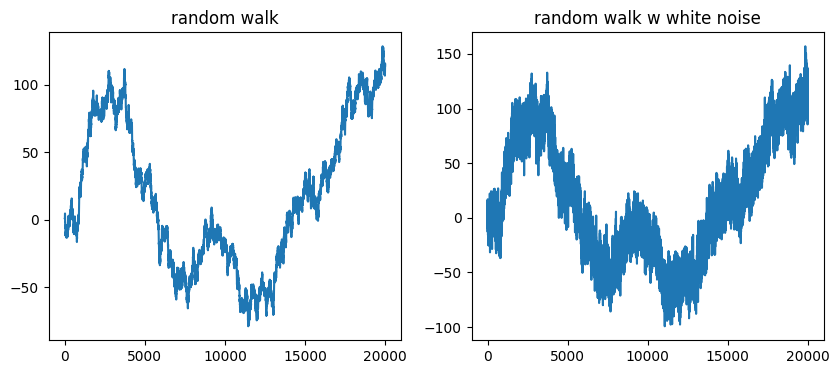

In [4]:
f=plt.gcf()
f.set_size_inches(10,4)
plt.subplot(121)
plt.plot(rwlks[0,:])
plt.title("random walk")
plt.subplot(122)
plt.title("random walk w white noise")
plt.plot(rwlks_wnoise[0,:])

In [5]:
block=100
avg=get_avg(rwlks_wnoise[0,:],block=block)
avg_x = np.arange(avg.shape[0])*block + block//2

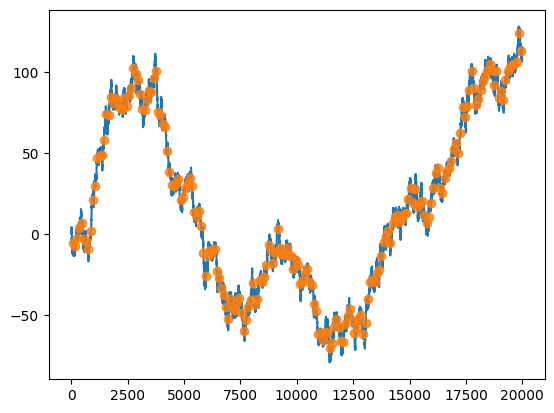

In [6]:
plt.plot(rwlks[0,:])
plt.plot(avg_x,avg, 'o',alpha=0.8)
# plt.xlim(100,500)